# Monitoria 03 - Projeto


## Análise Descritiva de Dados

#### Gabriel Ferreira dos Santos Silva

##### Conjunto de Dados Escolhido: Impacts of COVID-19 on Canadians - Mental Health

Fonte: 'Crowdsourcing: Impacts of COVID-19 on Canadians' Mental Health'
DOI: https://doi.org/10.25318/13250002-eng


##### Objetivo da Análise: predição de ansiedade severa
##### O Conjunto de dados possui 45.989 observações, com as as seguintes variáveis listadas:
* PUMFID 01-05 Public use microdata file identifier
* VERDATE 06-15 Version date of when the file was created
* MH_05 16-16 Perceived mental health
* MH_10 17-17 Mental health compared to before physical distancing
* MH_15A 18-18 Feeling nervous, anxious or on edge - Freq last 2 weeks
* MH_15B 19-19 Not being able to stop or control worrying - Freq last 2 weeks
* MH_15C 20-20 Worrying too much about different things - Freq last 2 weeks
* MH_15D 21-21 Trouble relaxing - Freq last 2 weeks
* MH_15E 22-22 Being so restless that it is hard to sit still - Freq last 2 weeks
* MH_15F 23-23 Becoming easily annoyed or irritable - Freq last 2 weeks
* MH_15G 24-24 Feeling afraid as if something awful might happen - Freq last 2 weeks
* MH_20 25-25 Perceived life stress
* BH_60A 26-26 Freq in last week - Went shopping at the grocery store or drugstore
* BH_60B 27-27 Freq in last week - Used delivery service for groceries or drugstore
* BH_60C 28-28 Freq in last week - Used a food delivery service for prepared food
* BH_55A 29-29 Concern about impact of COVID-19 - My own health
* BH_55B 30-30 Concern about impact of COVID-19 - Member of household’s health
* BH_55C 31-31 Concern about impact of COVID-19 - Vulnerable people’s health
* BH_55D 32-32 Concern about impact of COVID-19 - Canadian population’s health
* BH_55E 33-33 Concern about impact of COVID-19 - World population’s health
* BH_55F 34-34 Concern about impact of COVID-19 - Overloading the health system
* BH_55G 35-35 Concern about impact of COVID-19 - Civil disorder
* BH_55H 36-36 Concern about impact of COVID-19 - Maintaining social ties
* BH_55I 37-37 Concern about impact of COVID-19 - Able coop/supp during crisis
* BH_55J 38-38 Concern about impact of COVID-19 - Able coop/supp after crisis
* BH_55K 39-39 Concern about impact of COVID-19 - Family stress from confinem
* DEM_10 40-40 Gender benchmarked to sex
* MHDVMHI 41-41 Perceived mental health
* ANXDVGAD 42-43 Generalized Anxiety Severity Score
* ANXDVGAC 44-44 Generalized Anxiety Disorder Cut-point
* ANXDVSEV 45-45 Severity of Generalized Anxiety
* AGEGR_10 46-47 Age group in increments of 10
* PBH_55L 48-48 Concern about impact of COVID-19 - Violence in the home
* PCSIZMIZ 49-50 Community Size and Metropolitan Influence Zones
* PIIDFLAG 51-51 Indigenous identity flag
* PIMMST 52-52 Immigration status
* PLM_30 53-54 Scale - I might lose main job or main self-empl income next 4 weeks
* PLM_40 55-55 COVID-19 impacts ability meet financial obligations or essential needs
* PPROV 56-57 Province of residence
* PRURURB 58-58 Rural/Urban indicator
* PVISMIN 59-59 Visible minority flag
* PAGEGR 60-61 Age group
* PUMFFACT 62-73 Factor to benchmark survey to population totals, stand to num particip

##### A variável desfecho considerada foi ANXDVGAC 44-44 Generalized Anxiety Disorder Cut-point

## Roteiro de Análise
1. Importação dos Pacotes
2. Chamada do Conjunto de Dados
3. Transformação das Variáveis
4. Separação em treino e teste - Split aplicado de 80%
5. Retirada de variáveis indesejadas
6. Correlação/Teste de dependência *_(novo)_*
7. Gráficos de frequências para X_train
8. One Hot Encoding
9. Treinamento do Primeiro Modelo (Entrega 2)
10. Obtenção das métricas com base no conjunto de teste (Entrega 2)
11. Treinando e comparando múltiplos algoritmos (Entrega 3)
12. Desenvolvendo algoritmo selecionado (Entrega 3)
    * Logistic Regression
    * LightGBM
    * Adaboost
13. Feature Selection - Boruta (Entrega 3)
14. Modelo de Regressão Logística com Boruta (Entrega 3)
15. LGBM com Boruta (Entrega 3)
16. Criação do segundo modelo (sem variáveis de saúde mental)
17. BORUTA para seleção de variáveis no modelo sem componentes de saúde mental
18. Comparativo de múltiplos algoritmos
19. Treinamento do algoritmo Nearest Centroid
20. Obtenção das métricas de teste
21. Grid Search dos hiperparâmetros
22. Construção do novo modelo com base nos hiperparâmetros tunados
23. Obtenção das métricas de teste + AUROC plot + Shap values

## Dificuldades encontradas e Comentários

1. Inicialmente, a ideia era criar um modelo para predizer um quadro de ansiedade severa com, pelo menos, duas semanas de antecipação. No entanto, após o estudo do questionário aplicado, constatou-se a inviabilidade deste tipo de construção, em razão de as variáveis serem coletadas no momento do teste que determina o quadro de ansiedade e seu grau de severidade. Além disso, há diferenças de temporalidade, com referências a situações observadas pelo paciente nas últimas duas semandas, na última semana e no momento do teste.

2. Parte das variáveis disponíveis refere-se a informações relativas à saúde mental do paciente. Houve certa dificuldade em classificar algumas delas como causadora do desfecho ou causada pelo desfecho, o que prejudicou a interpretação de possíveis vazamentos de informação (data leakage). Para algumas variáveis, houve maior clareza, implicando a remoção imediata do modelo.

3. Foram construídos dois modelos: um com o conjunto de dados completo, com exceção das variáveis retiradas na etapa de pré-processamento, e outro sem as variávies relativas à saúde mental dos pacientes, buscando-se evitar situações de vazamento de informação. Foi adotada esta estratégia em função do alto poder preditivo apresentado pelo primeiro modelo, o que despertou a possibilidade das variáveis presentes estarem instrisicamente causadas pelo desfecho.

4. No segundo modelo, foi utilizado o algoritmo Nearest Centroid, que, embora pouco utilizado na literatura, apresentou o melhor desempenho no comparativo. Foi aplicado um grid search para a otimização dos hiperparâmetros, porém, pelo fato de o algoritmo não gerar função as probabilidades individuais (predict_proba), não foi possível realizar a otimização com base na AUROC. Desta forma, para o grid search, foi utilizada a métrica default para otimização (accuracy), apenas como exercício.

5. O segundo modelo, por apresentar, em sua maioria, variáveis comportamentais, apresentou um desempenho relativamente satisfatório, com um potencial preditivo interessante. A AUC obtida foi de 0,7036. Embora abaixo do ideal, indica que, diante de uma combinação de variáveis comportamentais e de saúde mental imunes a vazamento de informação, pode-se atingir desempenhos mais satisfatórios e uma maior capacidade preditiva da ansiedade severa em pacientes.

6. O Nearest Centroid, por não se tratar um algortimo tão convencional quanto os demais e, dada sua estrutura de cálculo, não permite a geração de valores shapley, nem da feature importance. Esta foi, portanto, uma dificuldade crítica na utilização deste algoritmo.

# 1) Importação dos Pacotes

In [ ]:
!pip install dfply
!pip install boruta
!pip install shap
!pip install pyforest


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import plotly.express as px
from sklearn.model_selection import train_test_split
from dfply import *
%matplotlib inline
sns.set(color_codes=True)

# 2) Chamada do Conjunto de Dados

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1kErGPTcfCJotNKceFIDW0Q_qLgNJlGM8")
df.head().T

,0,1,2,3,4
PUMFID,5106,5107,5108,5109,5110
VERDATE,10/06/2020,10/06/2020,10/06/2020,10/06/2020,10/06/2020
MH_05,3,3,1,2,3
MH_10,3,3,3,4,4
MH_15A,3,3,1,3,3
MH_15B,4,1,1,3,2
MH_15C,2,2,1,2,2
MH_15D,2,2,1,3,2
MH_15E,2,1,1,2,3
MH_15F,2,2,1,3,3


In [ ]:
df.info() # tomando informações sobre o tipo das variáveis parametrizadas na chamada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45989 entries, 0 to 45988
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PUMFID    45989 non-null  int64  
 1   VERDATE   45989 non-null  object 
 2   MH_05     45989 non-null  int64  
 3   MH_10     45989 non-null  int64  
 4   MH_15A    45989 non-null  int64  
 5   MH_15B    45989 non-null  int64  
 6   MH_15C    45989 non-null  int64  
 7   MH_15D    45989 non-null  int64  
 8   MH_15E    45989 non-null  int64  
 9   MH_15F    45989 non-null  int64  
 10  MH_15G    45989 non-null  int64  
 11  MH_20     45989 non-null  int64  
 12  BH_60A    45989 non-null  int64  
 13  BH_60B    45989 non-null  int64  
 14  BH_60C    45989 non-null  int64  
 15  BH_55A    45989 non-null  int64  
 16  BH_55B    45989 non-null  int64  
 17  BH_55C    45989 non-null  int64  
 18  BH_55D    45989 non-null  int64  
 19  BH_55E    45989 non-null  int64  
 20  BH_55F    45989 non-null  in

# 3) Transformação das Variáveis

Neste etapa, foi realizada a transformação da variável target. A variável escolhida foi ANXDVGAC 44-44 Generalized Anxiety Disorder Cut-point, cujo resultado é proveniente da realização do teste GAD-7. O resultado é estratificado em variável binária: 1 para aqueles que atingiram o cut-point de severidade e 2 para aqueles que não atingiram.

Das 45.989 observações, 623 não apresentaram o desfecho, representado, portanto, valores missing. Como o valor é relativamente baixo, considerando a totalidade do grupo, os 623 indivíduos foram retirados do modelo.

Nas linhas abaixo, transformamos a variável dicotômica 1 e 2 para o formato 1 e 0, criamos o conjunto features, que representa as variáveis X e ou conjunto outcome, que representa a variável y.

In [ ]:
# 3) Transformação das Variáveis
# 3.1) Gerando variável target
df['ANXDVGAC'] = [0 if x == 2 else 1 if x == 1 else 9 for x in df['ANXDVGAC']]
display(df['ANXDVGAC'].value_counts())

0    32167
1    13199
9      623
Name: ANXDVGAC, dtype: int64

In [ ]:
# Removendo os desfechos com NaN
df_filtrado = df[df["ANXDVGAC"] != 9]
display(df_filtrado['ANXDVGAC'].value_counts())

0    32167
1    13199
Name: ANXDVGAC, dtype: int64

In [ ]:
# Separando os conjuntos de dados entre variáveis "preditoras" e desfecho
features = df_filtrado.drop('ANXDVGAC',1)
outcome = df_filtrado.ANXDVGAC
np.random.seed(42)

# 4) Separação entre treino e teste

Nesta etapa, o conjunto de dados foi separado entre treino e teste, com a proporção de 80% e 20%, respectivamente.

Além disso, foram expurgadas variáveis candidatas a possível vazamento de informação. Foram elas:
* PUMFID 01-05 Public use microdata file identifier
* VERDATE 06-15 Version date of when the file was created
* MH_15A 18-18 Feeling nervous, anxious or on edge - Freq last 2 weeks
* ANXDVGAD 42-43 Generalized Anxiety Severity Score
* ANXDVSEV 45-45 Severity of Generalized Anxiety
* PUMFFACT 62-73 Factor to benchmark survey to population totals, stand to num particip

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2)

In [ ]:
# Obtendo o shape dos conjuntos de treino e teste
print(f"X_train Shape {X_train.shape}")
print(f"X_test Shape {X_test.shape}")
print(f"y_train Shape {y_train.shape}")
print(f"y_test Shape {y_test.shape}")

X_train Shape (36292, 42)
X_test Shape (9074, 42)
y_train Shape (36292,)
y_test Shape (9074,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36292 entries, 21571 to 16007
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PUMFID    36292 non-null  int64  
 1   VERDATE   36292 non-null  object 
 2   MH_05     36292 non-null  int64  
 3   MH_10     36292 non-null  int64  
 4   MH_15A    36292 non-null  int64  
 5   MH_15B    36292 non-null  int64  
 6   MH_15C    36292 non-null  int64  
 7   MH_15D    36292 non-null  int64  
 8   MH_15E    36292 non-null  int64  
 9   MH_15F    36292 non-null  int64  
 10  MH_15G    36292 non-null  int64  
 11  MH_20     36292 non-null  int64  
 12  BH_60A    36292 non-null  int64  
 13  BH_60B    36292 non-null  int64  
 14  BH_60C    36292 non-null  int64  
 15  BH_55A    36292 non-null  int64  
 16  BH_55B    36292 non-null  int64  
 17  BH_55C    36292 non-null  int64  
 18  BH_55D    36292 non-null  int64  
 19  BH_55E    36292 non-null  int64  
 20  BH_55F    36292 non-null

In [ ]:
# Verificando quantas categorias únicas por variável existem
cat_stats = pd.DataFrame(columns = ['Coluna', 'Valores', 'Contagem de Categorias'])
tmp = pd.DataFrame()

for c in X_train.columns:
    tmp['Coluna'] = [c]
    tmp['Valores'] = [X_train[c].unique()]
    tmp['Contagem de Categorias'] = f"A variável {c} possui {len(list(X_train[c].unique()))} categorias únicas"

    cat_stats = cat_stats.append(tmp)

cat_stats


,Coluna,Valores,Contagem de Categorias
0,PUMFID,"[26677, 38141, 19469, 9503, 10169, 43456, 1209...",A variável PUMFID possui 36292 categorias únicas
0,VERDATE,[10/06/2020],A variável VERDATE possui 1 categorias únicas
0,MH_05,"[2, 4, 3, 5, 1, 9]",A variável MH_05 possui 6 categorias únicas
0,MH_10,"[2, 4, 3, 5, 9, 1]",A variável MH_10 possui 6 categorias únicas
0,MH_15A,"[1, 4, 2, 3]",A variável MH_15A possui 4 categorias únicas
0,MH_15B,"[1, 4, 3, 2]",A variável MH_15B possui 4 categorias únicas
0,MH_15C,"[1, 4, 3, 2]",A variável MH_15C possui 4 categorias únicas
0,MH_15D,"[1, 4, 3, 2]",A variável MH_15D possui 4 categorias únicas
0,MH_15E,"[1, 3, 2, 4]",A variável MH_15E possui 4 categorias únicas
0,MH_15F,"[1, 4, 3, 2]",A variável MH_15F possui 4 categorias únicas


# 5) Retirada de Variáveis com possível vazamento de informação ou não relevantes para predição

Além disso, foram expurgadas variáveis candidatas a possível vazamento de informação ou sem relevância para prediçao. São elas:

* PUMFID 01-05 Public use microdata file identifier
* VERDATE 06-15 Version date of when the file was created
* MH_15A 18-18 Feeling nervous, anxious or on edge - Freq last 2 weeks
* ANXDVGAD 42-43 Generalized Anxiety Severity Score
* ANXDVSEV 45-45 Severity of Generalized Anxiety
* PUMFFACT 62-73 Factor to benchmark survey to population totals, stand to num particip

In [ ]:
# Retirar Variáveis com possível vazamento de informação
to_drop_list = ['PUMFID', 'VERDATE', 'MH_15A','ANXDVGAD','ANXDVSEV', 'PUMFFACT']
X_train = X_train.drop(columns= to_drop_list)
X_test = X_test.drop(columns= to_drop_list)

In [ ]:
X_train.describe()

,MH_05,MH_10,MH_15B,MH_15C,MH_15D,MH_15E,MH_15F,MH_15G,MH_20,BH_60A,...,PBH_55L,PCSIZMIZ,PIIDFLAG,PIMMST,PLM_30,PLM_40,PPROV,PRURURB,PVISMIN,PAGEGR
count,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,...,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00,36292.00
mean,2.82,3.57,1.89,2.05,2.14,1.74,2.21,1.87,3.09,3.26,...,1.08,2.58,1.98,1.14,4.74,3.30,36.65,1.98,1.99,5.47
std,1.06,0.84,0.97,0.97,1.01,0.93,0.98,0.97,0.95,0.53,...,0.50,1.50,0.36,0.47,4.78,1.14,13.41,0.88,0.80,2.67
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,10.00,1.00,1.00,1.00
25%,2.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00,...,1.00,1.00,2.00,1.00,4.00,3.00,35.00,2.00,2.00,3.00
50%,3.00,4.00,2.00,2.00,2.00,1.00,2.00,2.00,3.00,3.00,...,1.00,2.00,2.00,1.00,5.00,4.00,35.00,2.00,2.00,5.00
75%,4.00,4.00,2.00,3.00,3.00,2.00,3.00,2.00,4.00,4.00,...,1.00,3.00,2.00,1.00,6.00,4.00,47.00,2.00,2.00,8.00
max,9.00,9.00,4.00,4.00,4.00,4.00,4.00,4.00,9.00,9.00,...,9.00,9.00,9.00,9.00,99.00,9.00,63.00,9.00,9.00,10.00


# 6)  Correlação/Teste de dependência

* Objetivo: como estmaos diante de variáveis categóricas, o objetivo é gerar uma matrix de dependência entre as variáveis, com resultado do p-valor relativo ao seguinte teste de hipóteses:
    * H0: variáveis são dependentes
    * H1: Variáveis são independentes.
    
Retirado de: https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
resultant = pd.DataFrame(data=[(0 for i in range(len(X_train.columns))) for i in range(len(X_train.columns))],
                         columns=list(X_train.columns))
resultant.set_index(pd.Index(list(X_train.columns)), inplace = True)

# Encontrando os p-valores para as variáveis e formatando em matriz de p-valor

for i in list(X_train.columns):
    for j in list(X_train.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

          MH_05  MH_10  MH_15B  MH_15C  MH_15D  MH_15E  MH_15F  MH_15G  MH_20  \
MH_05      0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_10      0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_15B     0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_15C     0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_15D     0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_15E     0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_15F     0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_15G     0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
MH_20      0.00   0.00    0.00    0.00    0.00    0.00    0.00    0.00   0.00   
BH_60A     0.22   0.48    0.02    0.01    0.02    0.29    0.09    0.02   0.28   
BH_60B     0.92   0.77    0.00    0.00    0.00    0.00    0.00    0.00   0.27   
BH_60C     0.00   0.00    0.

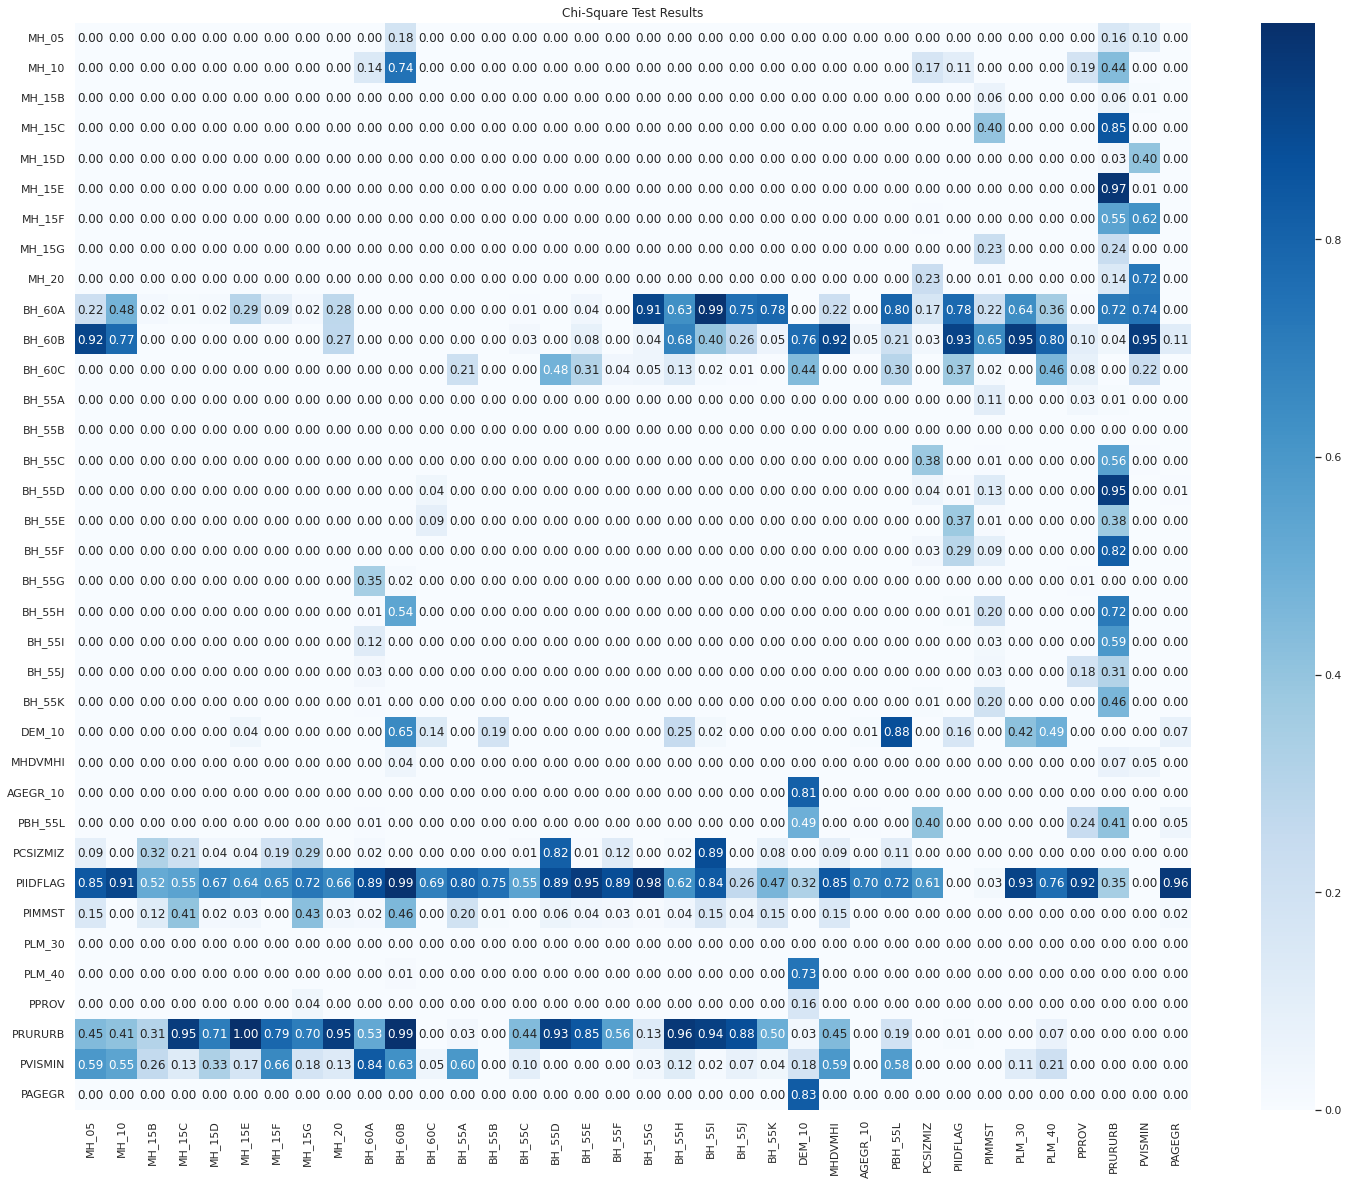

In [ ]:
# Plotando o heatmap
fig = plt.figure(figsize=(25,20))
sns.heatmap(resultant, annot=True, cmap='Blues',fmt='.2f')
plt.title('Chi-Square Test Results')
plt.show()

### Com base no teste chi-quadrado e no heatmap, é possível observar uma alta dependência entre as variávies, o que é bastante comum quando se trabalha com dados provenientes de questionários, em que, geralmente, as perguntas estão amarradas.
### As variáveis BH_60_A (Freq in last week - Went shopping at the grocery store or drugstore), BH_60_B (Freq in last week - Used delivery service for groceries or drugstore), PIIDFLAG (Indigenous identity flag), PRURURB (Rural/Urban indicator), PVISMIN (Visible minority flag) apresentaram maiores frequências de independência entre as variáveis preditoras.

# 7) Gráficos de Frequência em relação ao X_train

Obtenção de gráficos de frequências relativas como etapas de análise exploratória dos dados.

In [ ]:
X_train.columns

Index(['MH_05', 'MH_10', 'MH_15B', 'MH_15C', 'MH_15D', 'MH_15E', 'MH_15F',
       'MH_15G', 'MH_20', 'BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'MHDVMHI', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PLM_40', 'PPROV',
       'PRURURB', 'PVISMIN', 'PAGEGR'],
      dtype='object')

In [ ]:
feature = ['MH_05', 'MH_10', 'MH_15B', 'MH_15C', 'MH_15D', 'MH_15E', 'MH_15F',
       'MH_15G', 'MH_20', 'BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'MHDVMHI', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PLM_40', 'PPROV',
       'PRURURB', 'PVISMIN', 'PAGEGR']

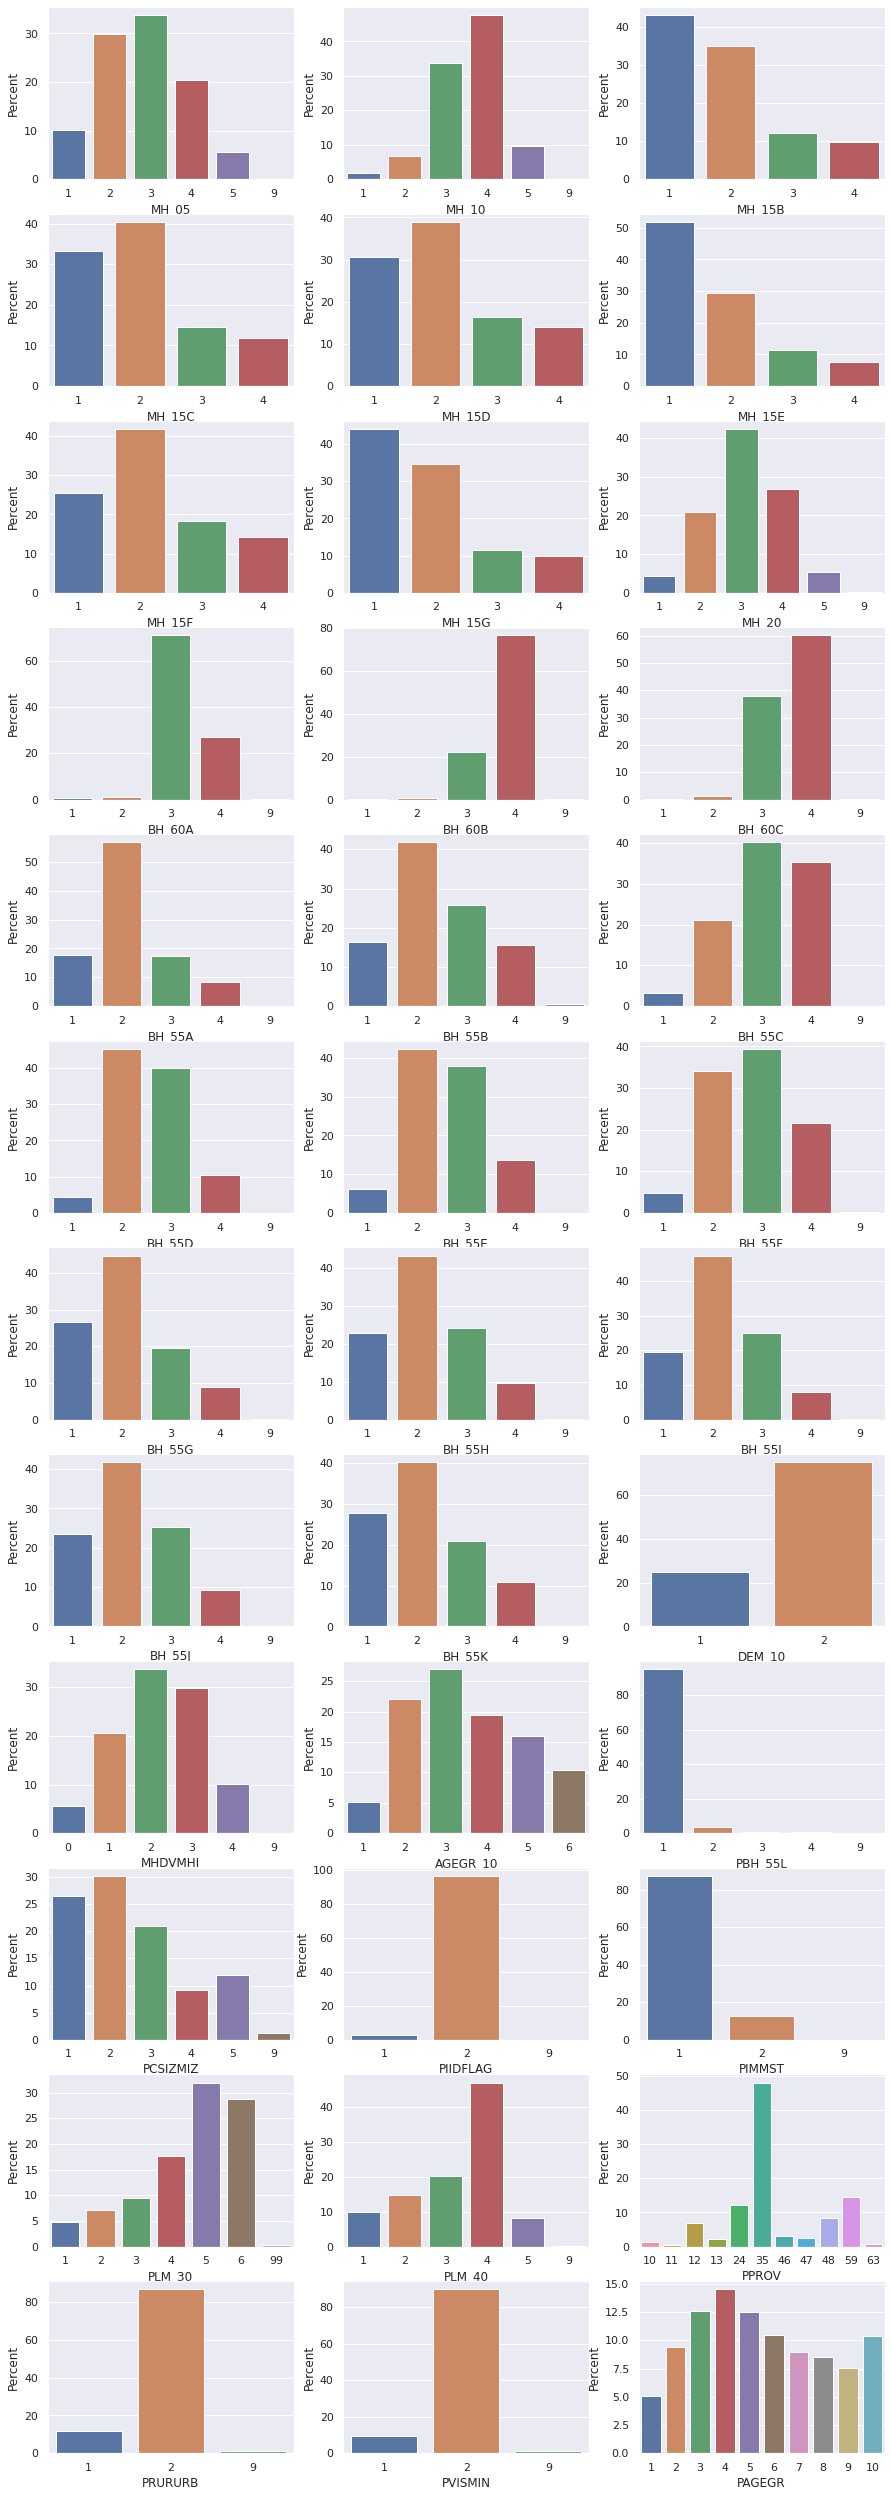

In [ ]:
plt.figure(figsize = (15,45))
for i in enumerate(feature):
    plt.subplot(12,3,i[0]+1)
    grafico = sns.barplot(x=i[1],y=i[1],
                data=X_train, estimator=lambda x: len(x) / len(X_train) * 100)
    grafico.set(ylabel="Percent")

# 8) Obtendo dummies (One Hot Encoding)

Os valores missing estão sendo tratados, nesse primeiro momento, como uma categoria. As variáveis apresentam o valor missing por meio do número 9 ou 99.

In [ ]:
# Criando a lista de variáveis a serem transformadas em dummies
to_dummy_list = list(X_train.columns)

In [ ]:
# Transformando as variáveis categóricas em dummys, tanto no teste, quando no treino
X_train = pd.get_dummies(X_train, columns = to_dummy_list)
X_test = pd.get_dummies(X_test, columns = to_dummy_list)

In [ ]:
X_train.head()

,MH_05_1,MH_05_2,MH_05_3,MH_05_4,MH_05_5,MH_05_9,MH_10_1,MH_10_2,MH_10_3,MH_10_4,...,PAGEGR_1,PAGEGR_2,PAGEGR_3,PAGEGR_4,PAGEGR_5,PAGEGR_6,PAGEGR_7,PAGEGR_8,PAGEGR_9,PAGEGR_10
21571,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
33035,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
14363,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4397,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5063,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# convertendo o desfecho para valor inteiro (em alguma das etapas anteriores, a variável foi transformava em float)
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

In [ ]:
y_train.dtypes

dtype('int64')

# 9) Treinando o primeiro algoritmo (xgboost)

O algoritmo treinado foi o xgboost, como forma de se obter o primeiro contato com o conjunto de dados. Ainda não foi realizada seleção de hiperâmetros, tampouco iterações.

O default utilizado foi:

`params = {
    'eta': 0.3,
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3,
    'eval_metric': "mlogloss"}
steps = 20'`


Foram realizados os seguintes passos:

* Importar o algoritmo e as métricas de avaliação
* Definição dos hiperparâmetros
* Criação e treinamento do modelo
* Teste do Modelo

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import xgboost as xgb

In [ ]:
clf_xgboost = xgb.XGBClassifier()
clf_xgboost.fit(X_train, y_train)

XGBClassifier()

In [ ]:
# Criação dos conjuntos de treino e teste no formato do xgboost

y_pred_xgboost =clf_xgboost.predict(X_test)
prob_pos_xgboost = clf_xgboost.predict_proba(X_test)[:,1]

# 10) Obtenção das métricas com base no conjunto de teste

Nesta primeira etapa, foram obtidas as seguintes métricas: precision, recall, accuracy e AUC(ROC)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report


print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))

print(classification_report(y_test, y_pred_xgboost))

XGBoost Model
Accuracy: 0.9763
Precision: 0.9697
Recall: 0.9480
AUC: 0.9979
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6441
           1       0.97      0.95      0.96      2633

    accuracy                           0.98      9074
   macro avg       0.97      0.97      0.97      9074
weighted avg       0.98      0.98      0.98      9074



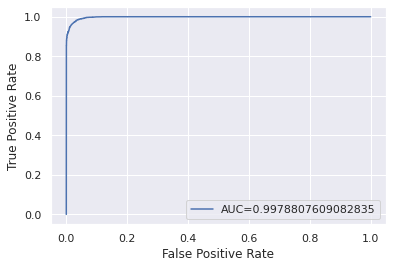

In [ ]:
# plotando a área sob a curva ROC
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  prob_pos_xgboost)
auc = metrics.roc_auc_score(y_test, prob_pos_xgboost)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Valores de AUROC apresentaram-se extramente elevados. Modelo será conduzido, porém com alerta de possível vazamento de informação. Variáveis serão estudadas por meio de feature importance e shap values.

# 11) Testando múltiplos algoritmos

Foi utilizado o lazypredict para comparar múltiplos algoritmos. Como o conjuno de dados é relativamente grande, deixei o código em comentário, anexando a imagem do resultado na linha seguinte.

In [ ]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#clf = LazyClassifier(verbose=0,ignore_warnings=True)
#models, predictions = clf.fit(X_train, X_test, y_train, y_test)
#models

![alt text](https://drive.google.com/uc?id=1-9cWY5ARuWtpryd-PvtkRmr-Sh03PE07)

# 12) Construção dos modelos

Obs: foram selecionados os seguintes modelos:
* Regresão Logística: melhor AUC e baixo tempo de construção
* LGBM: desempenho próximo ao CalibratedClassifierCV e ao LinearSVC, porém com um tempo de rodagem bastante inferior
* Adaboost: testar segundo melhor algoritmo de boost


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_log = pd.Series(model.predict(X_test))


In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_log)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_log)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_log)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_proba)))

Accuracy: 0.9764
Precision: 0.9625
Recall: 0.9559
AUC: 0.9981


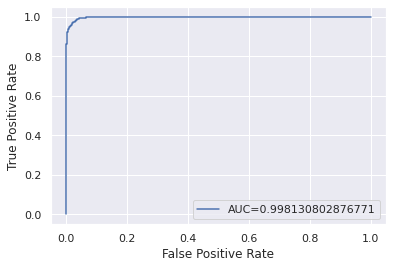

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Light GBM

In [ ]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=0,eval_metric='logloss')

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred_lgbm = pd.Series(model_lgbm.predict(X_test))
y_pred_proba_lgbm = model_lgbm.predict_proba(X_test)[::,1]

In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_lgbm)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_lgbm)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_lgbm)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_proba_lgbm)))

Accuracy: 0.9747
Precision: 0.9581
Recall: 0.9544
AUC: 0.9980


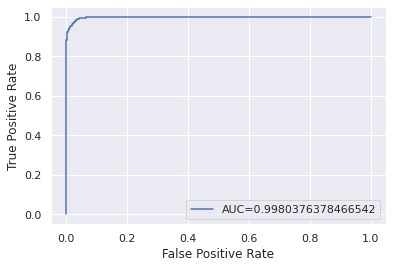

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lgbm)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lgbm)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

svc=SVC(probability=True, kernel='linear')

In [ ]:
model_ada = AdaBoostClassifier(n_estimators = 50, algorithm='SAMME', learning_rate = 1)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
y_pred_proba_ada = model_ada.predict_proba(X_test)[::,1]

In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_ada)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_ada)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_ada)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_proba_ada)))

Accuracy: 0.9734
Precision: 0.9676
Recall: 0.9400
AUC: 0.9975


# 13) Feature Selection com Boruta

Para a seleção de variáveis, foi utilizado o Boruta. As variáveis classificadas na áraea azul, em que a tomada de decisão é do condutor, não foram incluídas no modelo.

In [ ]:
list(X_train.columns)

['MH_05_1',
 'MH_05_2',
 'MH_05_3',
 'MH_05_4',
 'MH_05_5',
 'MH_05_9',
 'MH_10_1',
 'MH_10_2',
 'MH_10_3',
 'MH_10_4',
 'MH_10_5',
 'MH_10_9',
 'MH_15B_1',
 'MH_15B_2',
 'MH_15B_3',
 'MH_15B_4',
 'MH_15C_1',
 'MH_15C_2',
 'MH_15C_3',
 'MH_15C_4',
 'MH_15D_1',
 'MH_15D_2',
 'MH_15D_3',
 'MH_15D_4',
 'MH_15E_1',
 'MH_15E_2',
 'MH_15E_3',
 'MH_15E_4',
 'MH_15F_1',
 'MH_15F_2',
 'MH_15F_3',
 'MH_15F_4',
 'MH_15G_1',
 'MH_15G_2',
 'MH_15G_3',
 'MH_15G_4',
 'MH_20_1',
 'MH_20_2',
 'MH_20_3',
 'MH_20_4',
 'MH_20_5',
 'MH_20_9',
 'BH_60A_1',
 'BH_60A_2',
 'BH_60A_3',
 'BH_60A_4',
 'BH_60A_9',
 'BH_60B_1',
 'BH_60B_2',
 'BH_60B_3',
 'BH_60B_4',
 'BH_60B_9',
 'BH_60C_1',
 'BH_60C_2',
 'BH_60C_3',
 'BH_60C_4',
 'BH_60C_9',
 'BH_55A_1',
 'BH_55A_2',
 'BH_55A_3',
 'BH_55A_4',
 'BH_55A_9',
 'BH_55B_1',
 'BH_55B_2',
 'BH_55B_3',
 'BH_55B_4',
 'BH_55B_9',
 'BH_55C_1',
 'BH_55C_2',
 'BH_55C_3',
 'BH_55C_4',
 'BH_55C_9',
 'BH_55D_1',
 'BH_55D_2',
 'BH_55D_3',
 'BH_55D_4',
 'BH_55D_9',
 'BH_55E_1',
 'BH

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# criando estimador para o Boruta
forest = RandomForestClassifier(
   n_jobs = -1,
   max_depth = 5
)

boruta = BorutaPy(
   estimator = forest,
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['MH_05_1', 'MH_05_2', 'MH_05_3', 'MH_05_4', 'MH_05_5', 'MH_10_1', 'MH_10_2', 'MH_10_3', 'MH_10_4', 'MH_10_5', 'MH_15B_1', 'MH_15B_2', 'MH_15B_3', 'MH_15B_4', 'MH_15C_1', 'MH_15C_2', 'MH_15C_3', 'MH_15C_4', 'MH_15D_1', 'MH_15D_2', 'MH_15D_3', 'MH_15D_4', 'MH_15E_1', 'MH_15E_2', 'MH_15E_3', 'MH_15E_4', 'MH_15F_1', 'MH_15F_2', 'MH_15F_3', 'MH_15F_4', 'MH_15G_1', 'MH_15G_2', 'MH_15G_3', 'MH_15G_4', 'MH_20_1', 'MH_20_2', 'MH_20_3', 'MH_20_4', 'MH_20_5', 'BH_55A_1', 'BH_55A_2', 'BH_55A_3', 'BH_55A_4', 'BH_55B_1', 'BH_55B_2', 'BH_55B_4', 'BH_55C_2', 'BH_55C_3', 'BH_55C_4', 'BH_55D_2', 'BH_55D_4', 'BH_55E_2', 'BH_55E_4', 'BH_55F_2', 'BH_55F_4', 'BH_55G_1', 'BH_55G_3', 'BH_55G_4', 'BH_55H_1', 'BH_55H_3', 'BH_55H_4', 'BH_55I_1', 'BH_55I_2', 'BH_55I_3', 'BH_55I_4', 'BH_55J_1', 'BH_55J_3', 'BH_55J_4', 'BH_55K_1', 'BH_55K_2', 'BH_55K_3', 'BH_55K_4', 'DEM_10_1', 'DEM_10_2', 'MHDVMHI_0', 'MHDVMHI_1', 'MHDVMHI_2', 'MHDVMHI_3', 'MHDVMHI_4', 'AGEGR_10_6', 'PBH_55L_1', 'PBH_5

# 14) Modelo de Regressão Logística com Boruta

In [ ]:
# Modelo com Boruta - Selecionado as variáveis preditoras
X_train_boruta = X_train[['MH_05_1', 'MH_05_2', 'MH_05_3', 'MH_05_4', 'MH_05_5',
                          'MH_10_1', 'MH_10_2', 'MH_10_3', 'MH_10_4', 'MH_10_5',
                          'MH_15B_1', 'MH_15B_2', 'MH_15B_3', 'MH_15B_4', 'MH_15C_1',
                          'MH_15C_2', 'MH_15C_3', 'MH_15C_4', 'MH_15D_1', 'MH_15D_2',
                          'MH_15D_3', 'MH_15D_4', 'MH_15E_1', 'MH_15E_2', 'MH_15E_3',
                          'MH_15E_4', 'MH_15F_1', 'MH_15F_2', 'MH_15F_3', 'MH_15F_4',
                          'MH_15G_1', 'MH_15G_2', 'MH_15G_3', 'MH_15G_4', 'MH_20_1',
                          'MH_20_2', 'MH_20_3', 'MH_20_4', 'MH_20_5', 'BH_55A_1', 'BH_55A_2',
                          'BH_55A_3', 'BH_55A_4', 'BH_55B_1', 'BH_55B_2', 'BH_55B_4', 'BH_55C_2',
                          'BH_55C_3', 'BH_55C_4', 'BH_55D_2', 'BH_55D_4', 'BH_55E_2', 'BH_55E_4',
                          'BH_55F_2', 'BH_55F_4', 'BH_55G_1', 'BH_55G_3', 'BH_55G_4', 'BH_55H_1',
                          'BH_55H_3', 'BH_55H_4', 'BH_55I_1', 'BH_55I_2', 'BH_55I_3', 'BH_55I_4', 'BH_55J_1',
                          'BH_55J_3', 'BH_55J_4', 'BH_55K_1', 'BH_55K_2', 'BH_55K_3', 'BH_55K_4', 'DEM_10_1',
                          'DEM_10_2', 'MHDVMHI_0', 'MHDVMHI_1', 'MHDVMHI_2', 'MHDVMHI_3', 'MHDVMHI_4', 'AGEGR_10_6',
                          'PBH_55L_1', 'PBH_55L_2', 'PLM_30_1', 'PLM_30_5', 'PLM_40_1', 'PLM_40_4', 'PAGEGR_10']]

X_test_boruta = X_test[['MH_05_1', 'MH_05_2', 'MH_05_3', 'MH_05_4', 'MH_05_5',
                          'MH_10_1', 'MH_10_2', 'MH_10_3', 'MH_10_4', 'MH_10_5',
                          'MH_15B_1', 'MH_15B_2', 'MH_15B_3', 'MH_15B_4', 'MH_15C_1',
                          'MH_15C_2', 'MH_15C_3', 'MH_15C_4', 'MH_15D_1', 'MH_15D_2',
                          'MH_15D_3', 'MH_15D_4', 'MH_15E_1', 'MH_15E_2', 'MH_15E_3',
                          'MH_15E_4', 'MH_15F_1', 'MH_15F_2', 'MH_15F_3', 'MH_15F_4',
                          'MH_15G_1', 'MH_15G_2', 'MH_15G_3', 'MH_15G_4', 'MH_20_1',
                          'MH_20_2', 'MH_20_3', 'MH_20_4' , 'MH_20_5', 'BH_55A_1', 'BH_55A_2',
                          'BH_55A_3', 'BH_55A_4', 'BH_55B_1', 'BH_55B_2', 'BH_55B_4', 'BH_55C_2',
                          'BH_55C_3', 'BH_55C_4', 'BH_55D_2', 'BH_55D_4', 'BH_55E_2', 'BH_55E_4',
                          'BH_55F_2', 'BH_55F_4', 'BH_55G_1', 'BH_55G_3', 'BH_55G_4', 'BH_55H_1',
                          'BH_55H_3', 'BH_55H_4', 'BH_55I_1', 'BH_55I_2', 'BH_55I_3', 'BH_55I_4', 'BH_55J_1',
                          'BH_55J_3', 'BH_55J_4', 'BH_55K_1', 'BH_55K_2', 'BH_55K_3', 'BH_55K_4', 'DEM_10_1',
                          'DEM_10_2', 'MHDVMHI_0', 'MHDVMHI_1', 'MHDVMHI_2', 'MHDVMHI_3', 'MHDVMHI_4', 'AGEGR_10_6',
                          'PBH_55L_1', 'PBH_55L_2', 'PLM_30_1', 'PLM_30_5', 'PLM_40_1', 'PLM_40_4', 'PAGEGR_10']]

print('Shape sem boruta', X_train.shape, X_test.shape)
print('Shape com boruta', X_train_boruta.shape, X_test_boruta.shape)

Shape sem boruta (36292, 183) (9074, 183)
Shape com boruta (36292, 87) (9074, 87)


In [ ]:
model_logistic_boruta = LogisticRegression()
model_logistic_boruta.fit(X_train_boruta, y_train)

LogisticRegression()

In [ ]:
y_pred_proba_boruta = model_logistic_boruta.predict_proba(X_test_boruta)[::,1]
y_pred_log_boruta = pd.Series(model_logistic_boruta.predict(X_test_boruta))


In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_log_boruta)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_log_boruta)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_log_boruta)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_proba_boruta)))

Accuracy: 0.9773
Precision: 0.9612
Recall: 0.9605
AUC: 0.9981


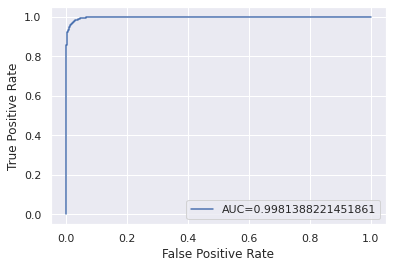

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_boruta)
auc = metrics.roc_auc_score(y_test, y_pred_proba_boruta)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 15) LGBM com Boruta

In [ ]:
import lightgbm as lgb
model_lgbm_boruta = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgbm_boruta.fit(X_train_boruta,y_train,eval_set=[(X_test_boruta,y_test),(X_train_boruta,y_train)],
          verbose=0,eval_metric='logloss')

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred_lgbm_boruta = pd.Series(model_lgbm_boruta.predict(X_test_boruta))
y_pred_proba_lgbm_boruta = model_lgbm_boruta.predict_proba(X_test_boruta)[::,1]

In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_lgbm_boruta)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_lgbm_boruta)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_lgbm_boruta)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_proba_lgbm_boruta)))

Accuracy: 0.9751
Precision: 0.9592
Recall: 0.9548
AUC: 0.9980


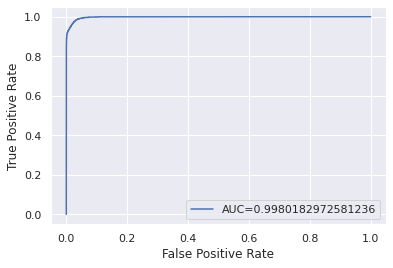

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lgbm_boruta)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lgbm_boruta)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

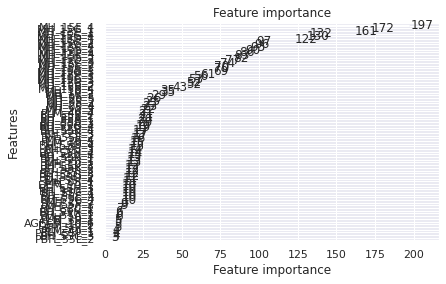

In [ ]:
# Feature Importance
lgb.plot_importance(model_lgbm_boruta)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(model=model_lgbm_boruta)
shap_values_train = explainer.shap_values(X_train_boruta, y_train)
shap.summary_plot(shap_values_train[1], X_train_boruta, plot_type="dot", plot_size=(20,15));

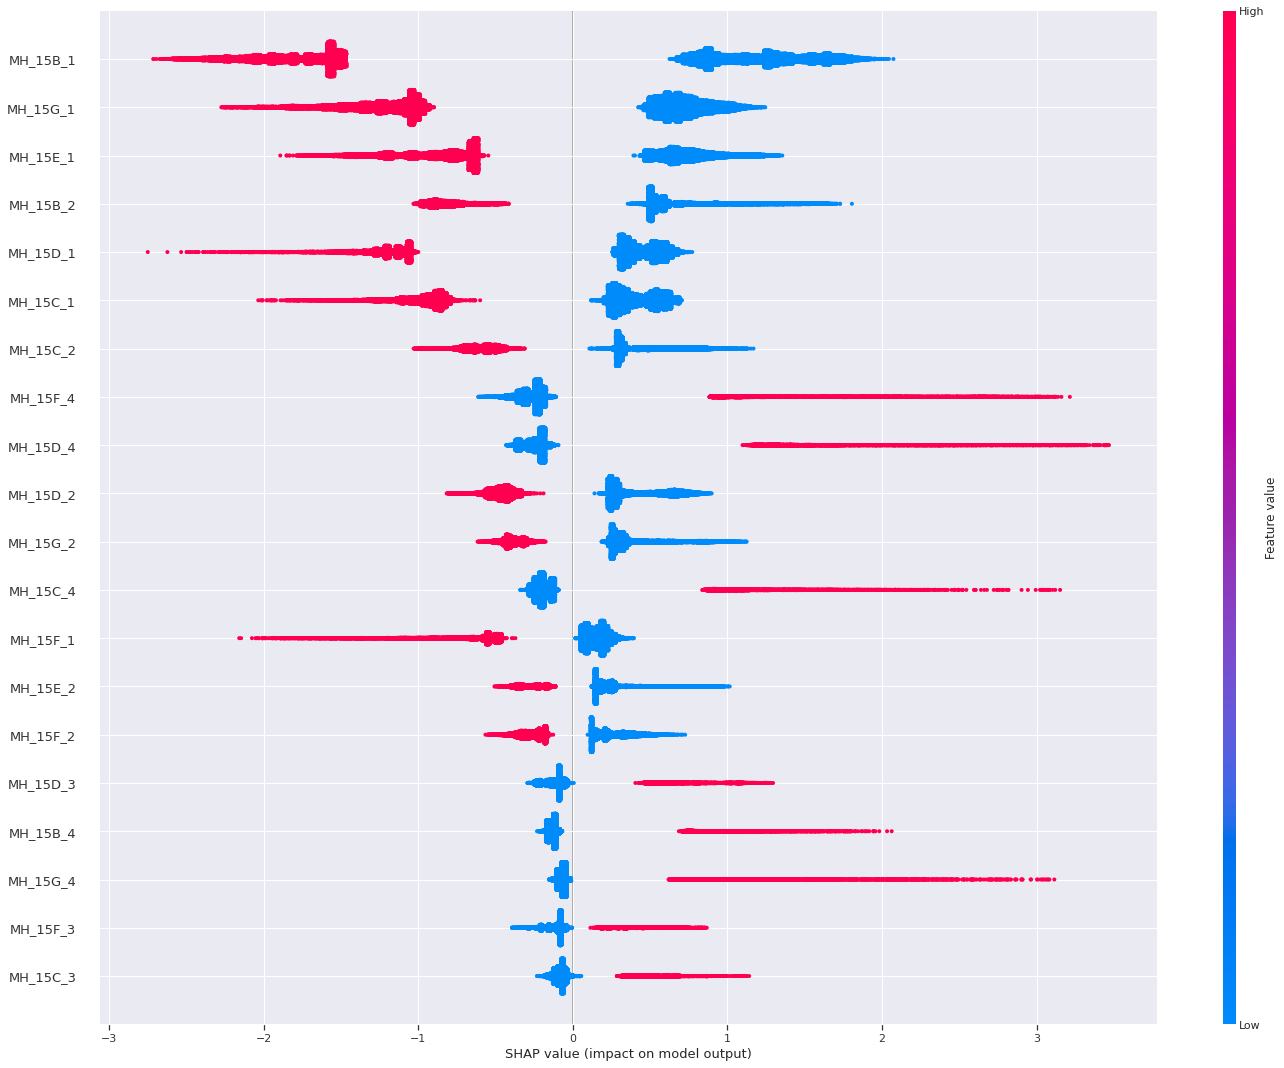

In [ ]:
explainer = shap.TreeExplainer(model=model_lgbm_boruta)
shap_values_train = explainer.shap_values(X_train_boruta, y_train)
shap.summary_plot(shap_values_train[1], X_train_boruta, plot_type="dot", plot_size=(20,15));

### As variáveis de maior poder preditor foram, exclusivamente, relativas à saúde mental do paciente. Nenhuma varíável comportamental apareceu entre as 25 com maior poder de predição. Por não saber ao certo a natureza de todas as variáveis (conhecimento tecnico em psicologia), optei por criar um modelo sem as variáveis de saúde mental.

# 16) Novo Modelo: retirando todas as variáveis sobre saúde mental (LGBM)

Considerando que o LGBM apresentou o melhor desempenho no conjunto completo, optei por manter este algoritmo na primeira aproximação com o modelo sem variáveis de saúde mental. No Boruta, o comparativo entre o desempenho dos algoritmos foi refeito.

In [ ]:
# Removendo todas as variáveis Mental Health (MH)

X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=42)
new_drop = ['MH_05', 'MH_10', 'MH_15B', 'MH_15C', 'MH_15D', 'MH_15E', 'MH_15F',
            'MH_15G', 'MH_20', 'MHDVMHI','PUMFID', 'VERDATE', 'MH_15A','ANXDVGAD','ANXDVSEV', 'PUMFFACT']
X_train_new = X_train.drop(columns= new_drop)
X_test_new = X_test.drop(columns= new_drop)

In [ ]:
to_dummy_list_new = list(X_train_new.columns)

In [ ]:
# Transformando as variáveis categóricas em dummys, tanto no teste, quando no treino
X_train_new = pd.get_dummies(X_train_new, columns = to_dummy_list_new)
X_test_new = pd.get_dummies(X_test_new, columns = to_dummy_list_new)

In [ ]:
# convertendo o desfecho para valor inteiro (em alguma das etapas anteriores, a variável foi transformava em float)
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

In [ ]:
# criando o novo modelo de lgbm
model_lgbm_new = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgbm_new.fit(X_train_new,y_train,eval_set=[(X_test_new,y_test),(X_train_new,y_train)],
          verbose=0,eval_metric='logloss')

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred_lgbm_new = pd.Series(model_lgbm_new.predict(X_test_new))
y_pred_proba_lgbm_new = model_lgbm_new.predict_proba(X_test_new)[:,1]

In [ ]:
# conferindo as métricas do conjunto de teste
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_lgbm_new)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_lgbm_new)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_lgbm_new)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_proba_lgbm_new)))


Accuracy: 0.7765
Precision: 0.6591
Recall: 0.4759
AUC: 0.8153


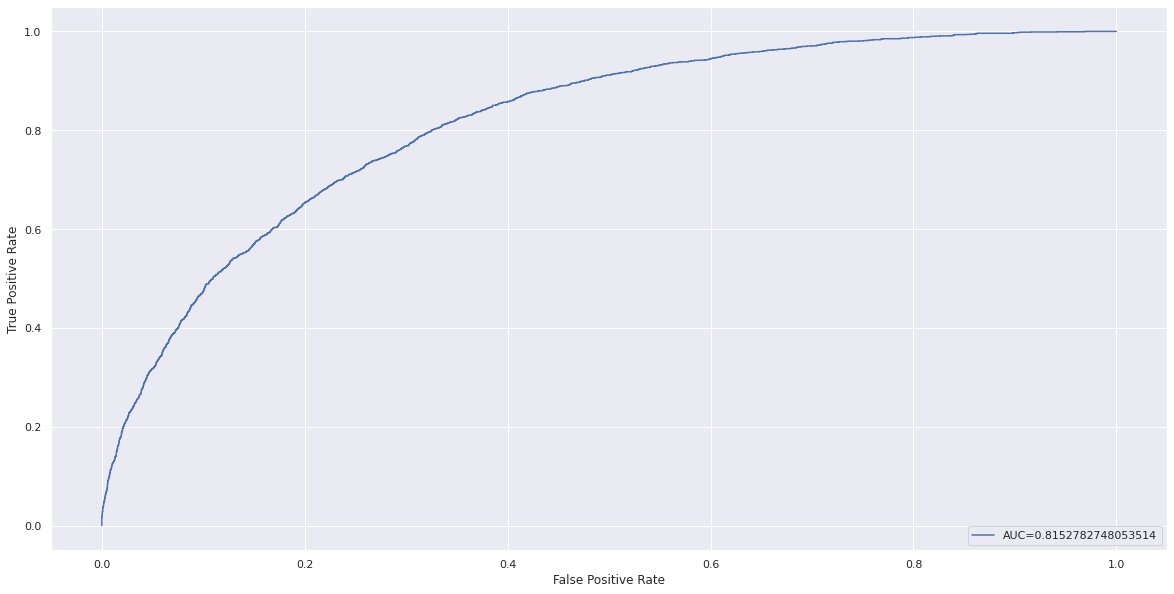

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lgbm_new)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lgbm_new)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

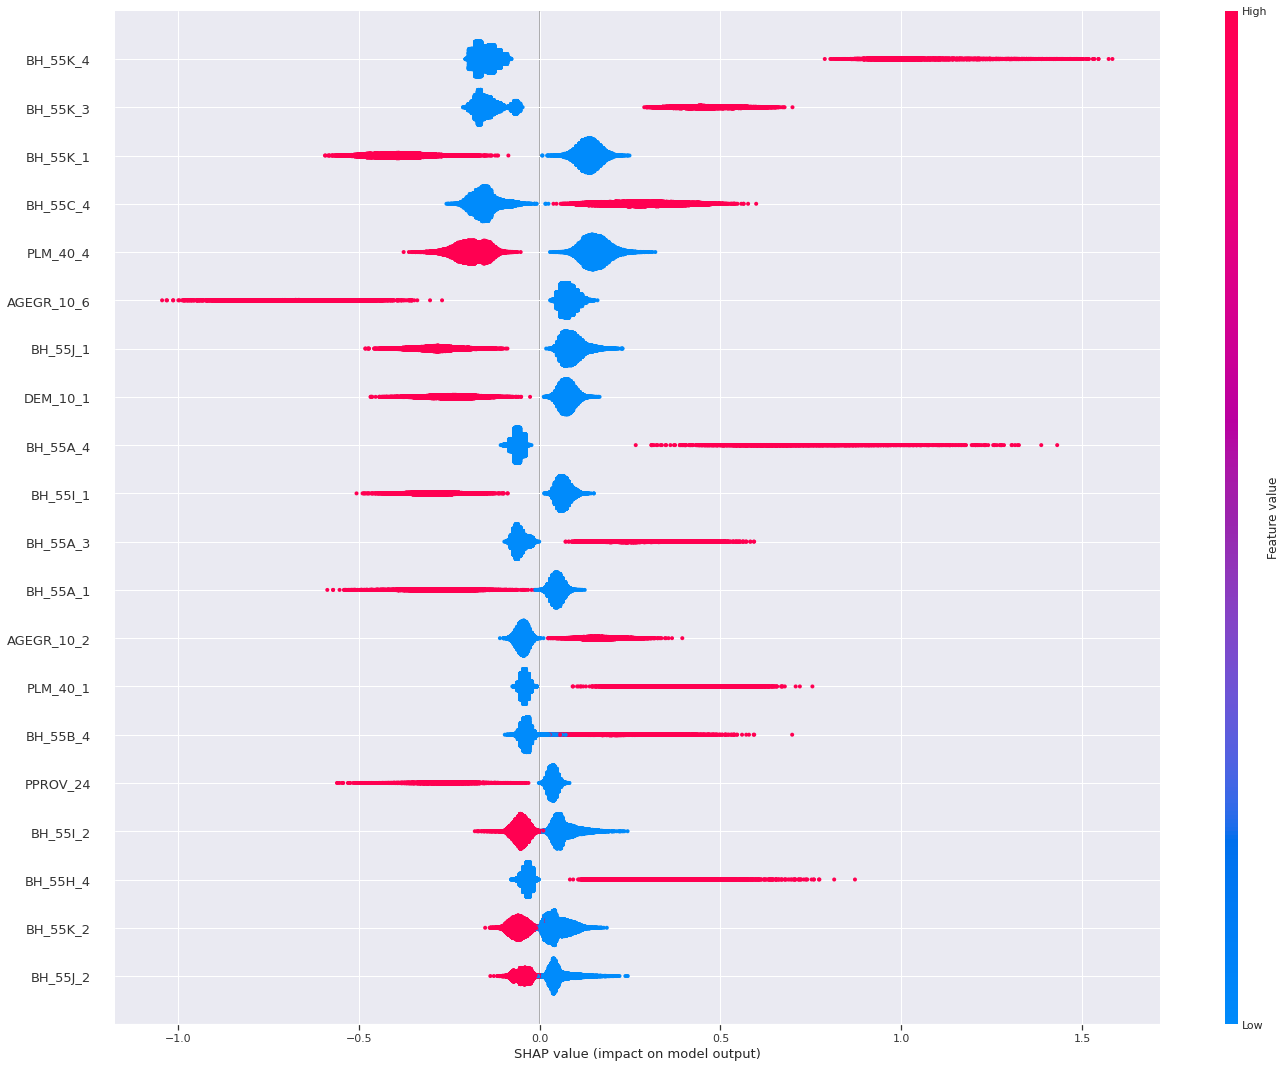

In [ ]:
explainer = shap.TreeExplainer(model=model_lgbm_new)
shap_values_train = explainer.shap_values(X_train_new, y_train)
shap.summary_plot(shap_values_train[1], X_train_new, plot_type="dot", plot_size=(20,15));

### Neste Shap, é possível perceber uma melhora na distribuição das variáveis e desfechos

# 17) BORUTA para seleção de variáveis no modelo sem componentes de saúde mental

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# criando estimator para o Boruta
forest = RandomForestClassifier(
   n_jobs = -1,
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest,
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train_new), np.array(y_train))

# resultados
green_area = X_train_new.columns[boruta.support_].to_list()
blue_area = X_train_new.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

In [ ]:
# Modelo com Boruta
X_train_boruta_new = X_train_new[['BH_60A_3', 'BH_60A_4', 'BH_60C_2', 'BH_60C_4', 'BH_55A_1',
                                  'BH_55A_2', 'BH_55A_3', 'BH_55A_4', 'BH_55B_1', 'BH_55B_2',
                                  'BH_55B_3', 'BH_55B_4', 'BH_55C_2', 'BH_55C_3', 'BH_55C_4',
                                  'BH_55D_2', 'BH_55D_3', 'BH_55D_4', 'BH_55E_2', 'BH_55E_4',
                                  'BH_55F_2', 'BH_55F_3', 'BH_55F_4', 'BH_55G_1', 'BH_55G_2',
                                  'BH_55G_3', 'BH_55G_4', 'BH_55H_1', 'BH_55H_2', 'BH_55H_3',
                                  'BH_55H_4', 'BH_55I_1', 'BH_55I_2', 'BH_55I_3', 'BH_55I_4',
                                  'BH_55J_1', 'BH_55J_2', 'BH_55J_3', 'BH_55J_4', 'BH_55K_1',
                                  'BH_55K_2', 'BH_55K_3', 'BH_55K_4', 'DEM_10_1', 'DEM_10_2',
                                  'AGEGR_10_1', 'AGEGR_10_2', 'AGEGR_10_3', 'AGEGR_10_5', 'AGEGR_10_6',
                                  'PBH_55L_1', 'PBH_55L_2', 'PBH_55L_3', 'PBH_55L_4', 'PIIDFLAG_1',
                                  'PIIDFLAG_2', 'PIMMST_1', 'PIMMST_2', 'PLM_30_1', 'PLM_30_2',
                                  'PLM_30_5', 'PLM_30_6', 'PLM_40_1', 'PLM_40_2', 'PLM_40_3',
                                  'PLM_40_4', 'PPROV_24', 'PVISMIN_1', 'PVISMIN_2', 'PAGEGR_1',
                                  'PAGEGR_2', 'PAGEGR_3', 'PAGEGR_9', 'PAGEGR_10']]
X_test_boruta_new = X_test_new[['BH_60A_3', 'BH_60A_4', 'BH_60C_2', 'BH_60C_4', 'BH_55A_1',
                                  'BH_55A_2', 'BH_55A_3', 'BH_55A_4', 'BH_55B_1', 'BH_55B_2',
                                  'BH_55B_3', 'BH_55B_4', 'BH_55C_2', 'BH_55C_3', 'BH_55C_4',
                                  'BH_55D_2', 'BH_55D_3', 'BH_55D_4', 'BH_55E_2', 'BH_55E_4',
                                  'BH_55F_2', 'BH_55F_3', 'BH_55F_4', 'BH_55G_1', 'BH_55G_2',
                                  'BH_55G_3', 'BH_55G_4', 'BH_55H_1', 'BH_55H_2', 'BH_55H_3',
                                  'BH_55H_4', 'BH_55I_1', 'BH_55I_2', 'BH_55I_3', 'BH_55I_4',
                                  'BH_55J_1', 'BH_55J_2', 'BH_55J_3', 'BH_55J_4', 'BH_55K_1',
                                  'BH_55K_2', 'BH_55K_3', 'BH_55K_4', 'DEM_10_1', 'DEM_10_2',
                                  'AGEGR_10_1', 'AGEGR_10_2', 'AGEGR_10_3', 'AGEGR_10_5', 'AGEGR_10_6',
                                  'PBH_55L_1', 'PBH_55L_2', 'PBH_55L_3', 'PBH_55L_4', 'PIIDFLAG_1',
                                  'PIIDFLAG_2', 'PIMMST_1', 'PIMMST_2', 'PLM_30_1', 'PLM_30_2',
                                  'PLM_30_5', 'PLM_30_6', 'PLM_40_1', 'PLM_40_2', 'PLM_40_3',
                                  'PLM_40_4', 'PPROV_24', 'PVISMIN_1', 'PVISMIN_2', 'PAGEGR_1',
                                  'PAGEGR_2', 'PAGEGR_3', 'PAGEGR_9', 'PAGEGR_10']]


# 19) Treinamento do modelo "Final"

In [ ]:
model_lgbm_new_boruta = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgbm_new_boruta.fit(X_train_boruta_new,y_train,eval_set=[(X_test_boruta_new,y_test),(X_train_boruta_new,y_train)],
          verbose=0,eval_metric='logloss')

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred_lgbm_new_boruta = pd.Series(model_lgbm_new_boruta.predict(X_test_boruta_new))
y_pred_proba_lgbm_new_boruta = model_lgbm_new_boruta.predict_proba(X_test_boruta_new)[:,1]

In [ ]:
# conferindo as métricas do conjunto de teste
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_lgbm_new_boruta)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_lgbm_new_boruta)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_lgbm_new_boruta)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_proba_lgbm_new_boruta)))


Accuracy: 0.7746
Precision: 0.6541
Recall: 0.4740
AUC: 0.8153


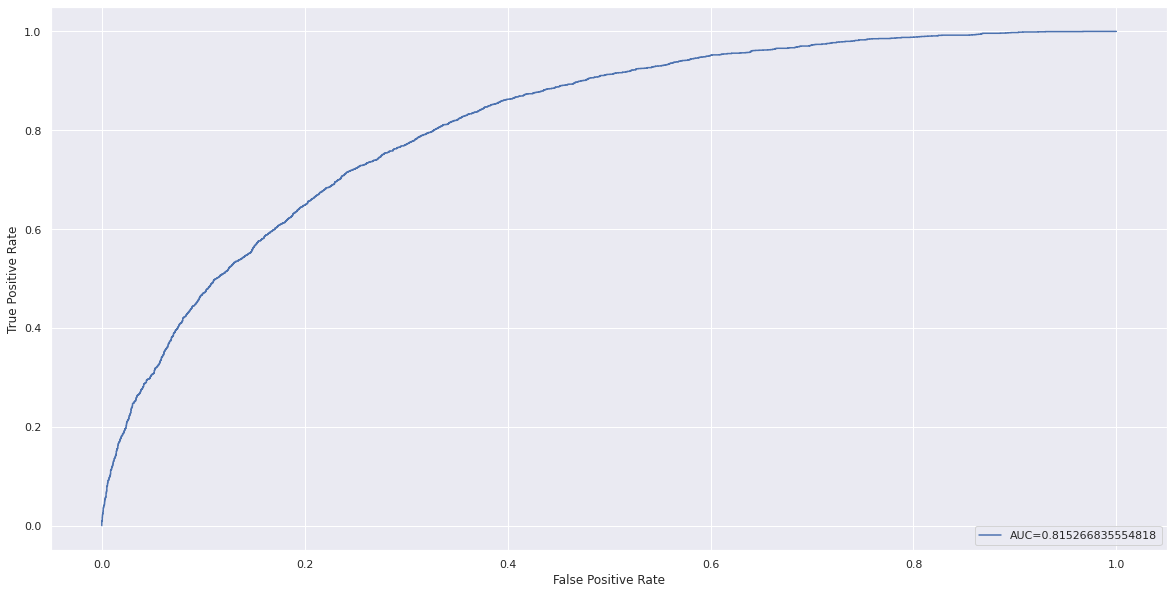

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lgbm_new_boruta)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lgbm_new_boruta)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

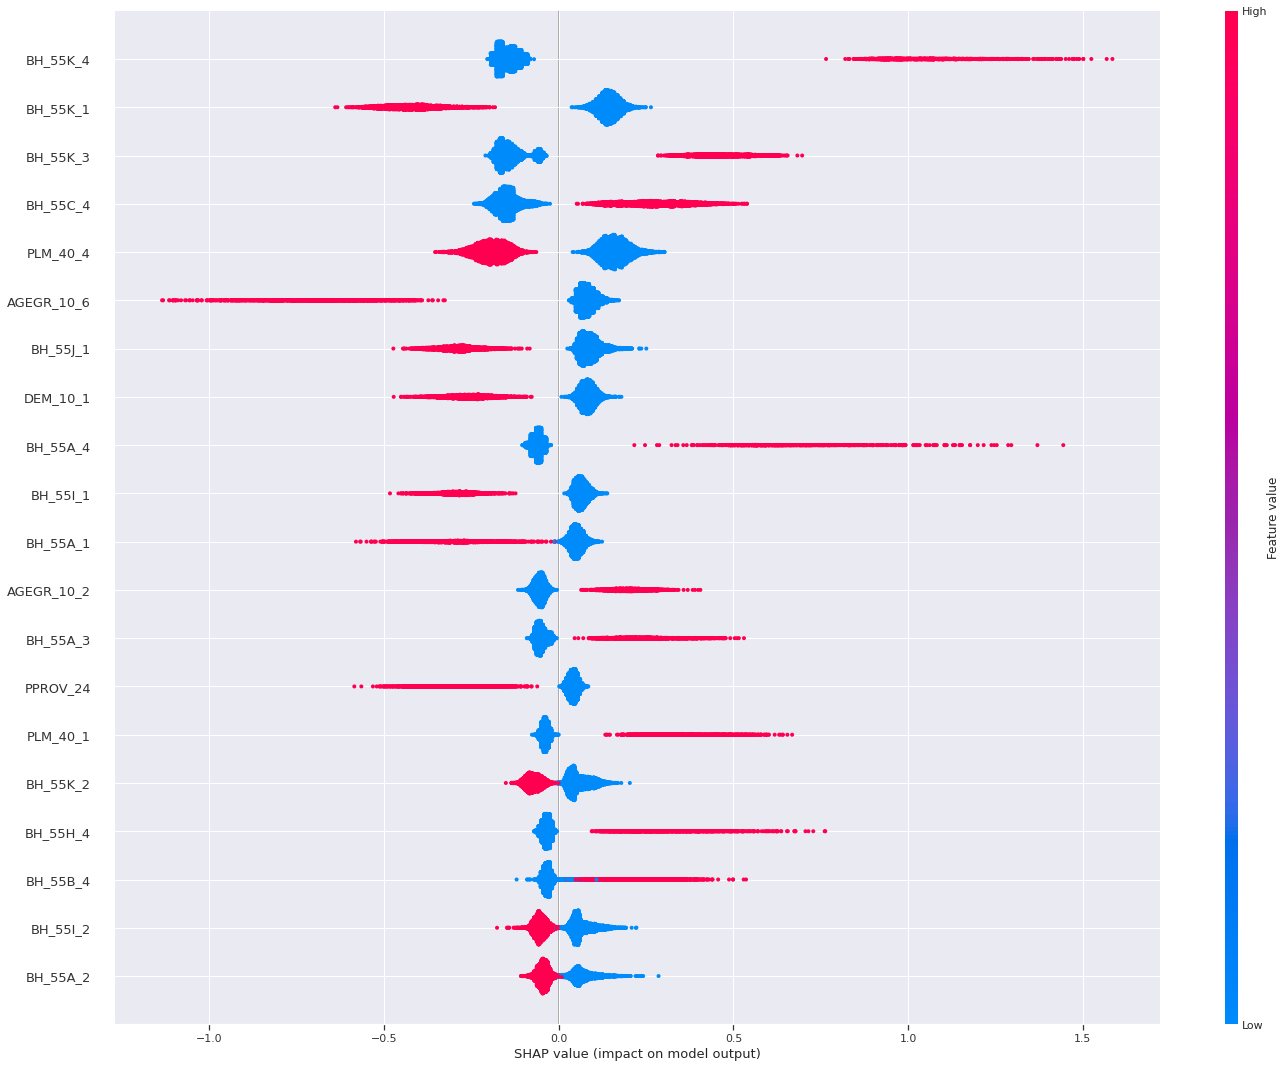

In [ ]:
explainer = shap.TreeExplainer(model=model_lgbm_new_boruta)
shap_values_train = explainer.shap_values(X_test_boruta_new, y_train)
shap.summary_plot(shap_values_train[1], X_test_boruta_new, plot_type="dot", plot_size=(20,15));